# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [ ]:
from google.colab import drive

drive.mount('/content/drive') #connecting to google drive

Mounted at /content/drive


## **Importing the necessary libraries**

In [ ]:
# importing the libareries needed for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization, Flatten
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

**Let us check the version of tensorflow.**

In [ ]:
tf.__version__ #updated

'2.12.0'

## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [ ]:
import h5py

h5f = h5py.File('/content/drive/MyDrive/training data/SVHN_single_grey1.h5', 'r') #calling the file
#declaring the data and assigning it to re-usable variables
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

h5f.close() #closing the file

Check the number of images in the training and the testing dataset.

In [ ]:
len(X_train), len(X_test)  #determines the length of the data set

(42000, 18000)

**Observation:** The length of the x train is much larger than the x test set so that the model would be training on varity of digits within the dataset. With 20% for test and 80% for training.

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

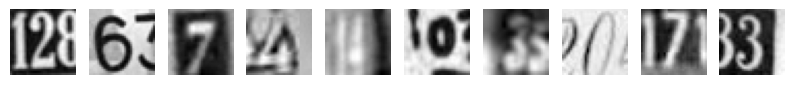

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
plt.figure(figsize = (10, 1)) # figure size

for i in range(10): #to loop around each figure within the dataset
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap = "gray") #coloring image as gray
    plt.axis('off') #turning off axis/labels underneath the image

plt.show()
print('label for each of the above image: %s' % (y_train[0:10])) # assigning numbers to each of the image's output

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
print("Shape:", X_train[0].shape) #shape of x_train first image
print()
print("First image:\n", X_train[0]) # pixel values of the first image within the x_train data

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [ ]:
X_train = X_train.reshape(X_train.shape[0], 1024) #reshaping the x_train data

X_test = X_test.reshape(X_test.shape[0], 1024)

### **Normalize the train and the test data**

In [ ]:
X_train = X_train / 255.0 #using 255 to normalize the data for x_train
X_test = X_test / 255.0 #using 255 to normalize the data for x_train

Print the shapes of Training and Test data

In [ ]:
print('Training set:', X_train.shape, y_train.shape) #outputting the new shape for the training and test set compared to the original shape
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)


### **One-hot encode output**

In [ ]:
from tensorflow.keras.utils import to_categorical

# converting the labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
#displaying the one-hot encoded label
y_test


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Observation:**
Every image within the data set has 32x32 shape with unique pixel values, image then got compacted into 1D with the length of 1024. The images then got normalized by diving 255 so that it would help the model train faster. Finally, image values got one-hot encode to convert them from integers to binary into 10 classes catagory for model building and training.

## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [ ]:
np.random.seed(42) # declaring a seed random number to maintain reliability
import random #importing the library
random.seed(42)
tf.random.set_seed(42) # setting a seed for tf random number generator

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [ ]:
def nn_model_1(): #function to build the model with its appropriate variables/declarations listed above
    model = Sequential()
    # 64 hidden layer
    model.add(Dense(64, activation='relu', input_shape = (1024,)))
    # 32 hidden layer
    model.add(Dense(32, activation='relu'))
    # output layer with 10 for classes
    model.add(Dense(10, activation='softmax'))
    # compiling the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# creating the model here
model = nn_model_1()

# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=20,
                    batch_size=128,
                    verbose=1) # training the model with its appropriate values using the training variables

Epoch 1/20
263/263 [==============================] - 4s 11ms/step - loss: 2.2934 - accuracy: 0.1233 - val_loss: 2.2324 - val_accuracy: 0.1744
Epoch 2/20
263/263 [==============================] - 2s 7ms/step - loss: 2.0774 - accuracy: 0.2509 - val_loss: 1.9318 - val_accuracy: 0.3089
Epoch 3/20
263/263 [==============================] - 2s 6ms/step - loss: 1.8679 - accuracy: 0.3405 - val_loss: 1.7779 - val_accuracy: 0.3869
Epoch 4/20
263/263 [==============================] - 1s 5ms/step - loss: 1.6573 - accuracy: 0.4391 - val_loss: 1.5288 - val_accuracy: 0.4907
Epoch 5/20
263/263 [==============================] - 1s 6ms/step - loss: 1.4635 - accuracy: 0.5180 - val_loss: 1.4202 - val_accuracy: 0.5255
Epoch 6/20
263/263 [==============================] - 1s 5ms/step - loss: 1.3588 - accuracy: 0.5568 - val_loss: 1.3240 - val_accuracy: 0.5768
Epoch 7/20
263/263 [==============================] - 1s 5ms/step - loss: 1.2895 - accuracy: 0.5839 - val_loss: 1.2558 - val_accuracy: 0.6013
Epoch

### **Plot the Training and Validation Accuracies and write down your Observations.**

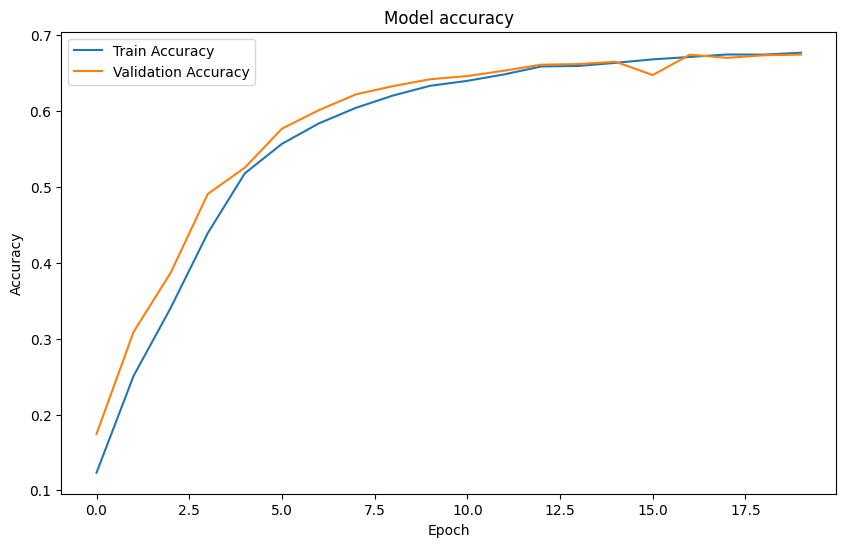

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()
# plotting the output of the built model

**Observations:** Model building starts with using a random seed **42**, the model has 64 and 32 nodes for each layer to then be densed with 10 softmax, the model then trained within a short period of time around a minute, and based on the plotted graph the model is performing well with the training accuracy at 70% and validation accurary at also 70% and being quite similiar within the graph with a minor drop of 0.05 in epoch 15.


Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
from tensorflow.keras import backend

backend.clear_session() #clearing the previous data within the memory to start fresh for the new model

np.random.seed(42) #generating see for the model to be reliable

import random

random.seed(42)

tf.random.set_seed(42) # setting a seed number for tf

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [ ]:
# reimporting libararies here to keep train of the ones to be used for ANN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

def nn_model_2(): # function to train ANN model with his declared variables listed above
    model = Sequential()
    # 1st hidden layer with 256 nodes
    model.add(Dense(256, activation='relu', input_shape = (1024,)))
    # 2nd hidden layer with 128 nodes
    model.add(Dense(128, activation='relu'))
    # dropout layer with rate 0.2
    model.add(Dropout(0.2))
    # 3d hidden layer with 64 nodes
    model.add(Dense(64, activation='relu'))
    # 4th hidden layer with 64 nodes
    model.add(Dense(64, activation='relu'))
    # 5th hidden layer with 32 nodes
    model.add(Dense(32, activation='relu'))
    # batch normalization layer
    model.add(BatchNormalization())
    # output layer using softmax
    model.add(Dense(10, activation='softmax'))
    # Compiling the model here
    model.compile(optimizer=Adam(learning_rate=0.0005),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# create the model
model_2 = nn_model_2()

# print the model summary
model_2.summary()

# train the model
history_2 = model_2.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=128, verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               262400    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)              

### **Plot the Training and Validation Accuracies and write down your Observations.**

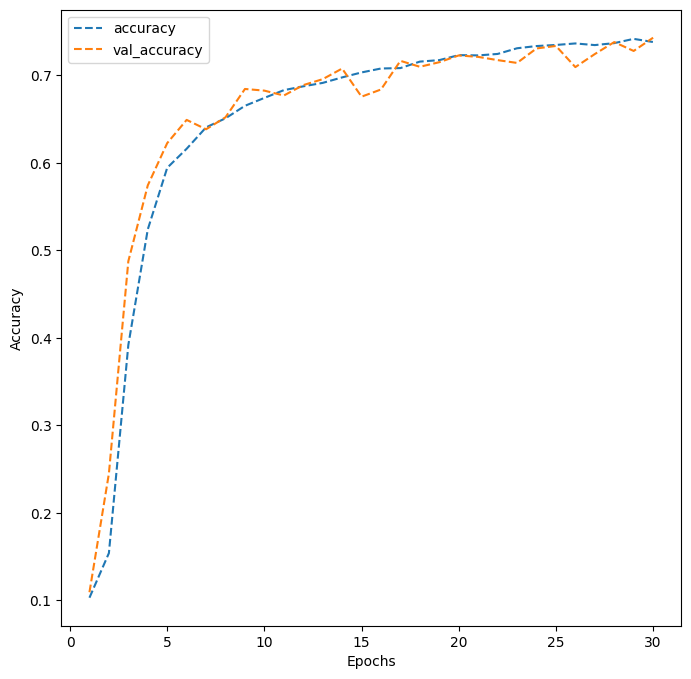

In [ ]:
#plotting the graph and declaring which model to plot
dict_hist = history_2.history

list_ep = [i for i in range(1, 31)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:** The second ann model has more nodes, the nodes hidden layers starts off with 256, 128, 64, 64 then finally 32 which took slightly longer than the first model in time complexity since it has more epochs **32** and nodes than previous one. The output of the model is slightly similiar to the first architecture model but when it comes to validation accuracy it has 70% accuracy and it was slightly dropping at random epochs, which could mean the model is performing slightly worse than the first ann model, which could result in overfitting if more nodes were added within the model
.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# make predictions on the test set
y_pred = model_2.predict(X_test)


563/563 [==============================] - 4s 6ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.73      0.78      1814
           1       0.77      0.79      0.78      1828
           2       0.67      0.82      0.74      1803
           3       0.66      0.74      0.70      1719
           4       0.82      0.78      0.80      1812
           5       0.77      0.65      0.71      1768
           6       0.78      0.70      0.74      1832
           7       0.77      0.79      0.78      1808
           8       0.68      0.72      0.70      1812
           9       0.73      0.72      0.72      1804

    accuracy                           0.74     18000
   macro avg       0.75      0.74      0.74     18000
weighted avg       0.75      0.74      0.74     18000

Confusion Matrix:

[[1319   45   57   38   38   17   93   29   76  102]
 [  25 1447   60   75   38   18   11   84   44   26]
 [   4   24 1485   52   27   19   10  111   19   52]
 [  25   55  104 1274   14   98    5   

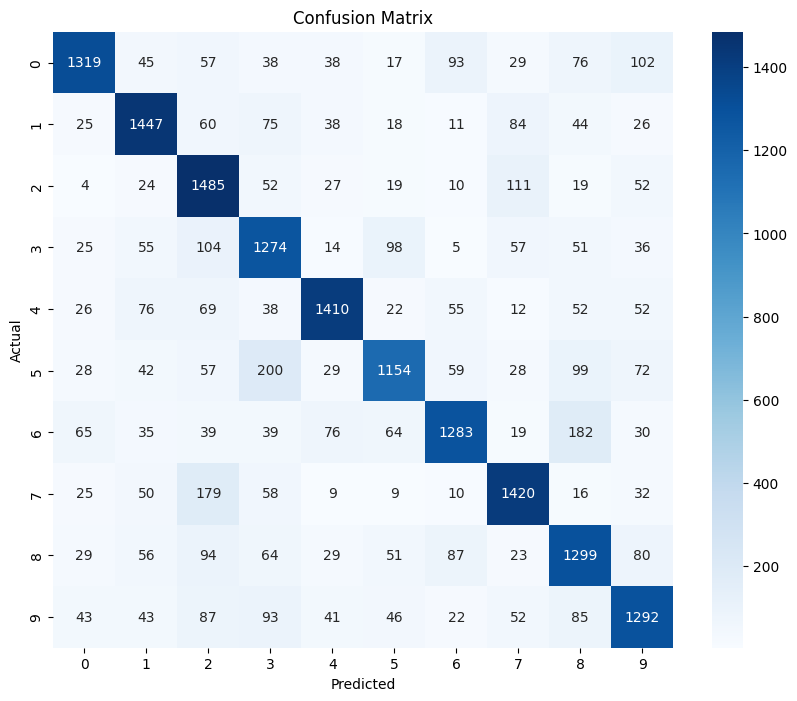

In [ ]:
# print the classification report
print("Classification Report:\n")
print(classification_report(y_test_classes, y_pred_classes))

# Print confusion matrix
print("Confusion Matrix:\n")
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
print(conf_matrix)
# plotting heat map for confusion matrix to determine the performance
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Final Observations:** The first model shows that less nodes are better when it comes to training the data. By increasing the nodes, it could cause the model to be overfitted and useless. Both models have achieved 70% accuracy which is fair but not perfect. The confusion matrix shows the second model is preforming well overall, but at some classes there are slight misclassifications. But for the perfect balance, a finetuning for each of the model's hyperparamters would make the performance and accuracy of the ann model better.

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [ ]:
import h5py

# Load the dataset again
h5f = h5py.File('/content/drive/MyDrive/training data/SVHN_single_grey1.h5', 'r')
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
h5f.close()

Check the number of images in the training and the testing dataset.

In [ ]:
len(X_train), len(X_test) # outputting the data of x train & test here

(42000, 18000)

**Observation:** Reloaded the data with its original length of (42000, 18000)
so that it would be trained for cnn model, without the interference of previous model.


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
print("Shape of the first image in the training dataset:", X_train[0].shape) # shape of x train
print("Array of pixels for the first image:\n", X_train[0]) # pixel values of x_train[0]

Shape of the first image in the training dataset: (32, 32)
Array of pixels for the first image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 32, 32, 1)) #reshaping for cnn model
X_test = X_test.reshape((X_test.shape[0], 32, 32, 1))

Normalize inputs from 0-255 to 0-1

In [ ]:
X_train = X_train / 255.0 # normalization for data
X_test = X_test / 255.0

Print New shape of Training and Test

In [ ]:
print("New shape of training data:", X_train.shape) #printing new shape that will be used for cnn model
print("New shape of testing data:", X_test.shape)

New shape of training data: (42000, 32, 32, 1)
New shape of testing data: (18000, 32, 32, 1)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [ ]:
y_train = to_categorical(y_train, num_classes=10) # one-hot encode for the target y train and y test
y_test = to_categorical(y_test, num_classes=10)

**Observation:** For the CNN model training data preparation, firstly need to check the shape and its pixels, after checking the shape and pixels its is given a shape of 4D (32,32,32,32,1), after that the normalization layer was performed to pixel values of 0 to 1, this would help the model to perform well in the model training process. Then one-hot encoder was applied to convert the labels into a format that could be used for the multiple classification. This steps really shows the importance of data preparation before the training of the model, without the careful steps the model wouldn't be trained properly nor will it perform well.


## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [ ]:
import numpy as np
import random
import tensorflow as tf

# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [ ]:
from tensorflow.keras.models import Sequential # recalling libraries here to see the importance of libraries that will be used within the cnn_model_1 function
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam

def cnn_model_1(input_shape): # building the cnn model here with the values given above
    model = Sequential()

    #first Convolutional layer
    model.add(Conv2D(16, (3, 3), padding='same', input_shape=input_shape))
    model.add(LeakyReLU(alpha=0.1))

    #second Convolutional layer
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))

    # max-pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # flatten the output
    model.add(Flatten())

    # dense layer
    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.1))

    # output layer
    model.add(Dense(10, activation='softmax'))

    # compiling the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

input_shape = (32, 32, 1)

# creating the model
cnn_model_1 = cnn_model_1(input_shape)

# the model summary
cnn_model_1.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 32, 32, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                      

In [ ]:
history_cnn_model_1 = cnn_model_1.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=1) # traing the model with its appropriate values declared above

Epoch 1/20
1050/1050 [==============================] - 100s 94ms/step - loss: 1.1274 - accuracy: 0.6303 - val_loss: 0.6497 - val_accuracy: 0.8087
Epoch 2/20
1050/1050 [==============================] - 96s 92ms/step - loss: 0.5352 - accuracy: 0.8475 - val_loss: 0.5254 - val_accuracy: 0.8448
Epoch 3/20
1050/1050 [==============================] - 98s 93ms/step - loss: 0.4416 - accuracy: 0.8700 - val_loss: 0.5049 - val_accuracy: 0.8532
Epoch 4/20
1050/1050 [==============================] - 95s 91ms/step - loss: 0.3781 - accuracy: 0.8888 - val_loss: 0.4486 - val_accuracy: 0.8739
Epoch 5/20
1050/1050 [==============================] - 96s 91ms/step - loss: 0.3330 - accuracy: 0.9004 - val_loss: 0.4592 - val_accuracy: 0.8717
Epoch 6/20
1050/1050 [==============================] - 94s 89ms/step - loss: 0.2944 - accuracy: 0.9115 - val_loss: 0.4640 - val_accuracy: 0.8735
Epoch 7/20
1050/1050 [==============================] - 94s 90ms/step - loss: 0.2622 - accuracy: 0.9216 - val_loss: 0.4506 

### **Plot the Training and Validation Accuracies and Write your observations.**

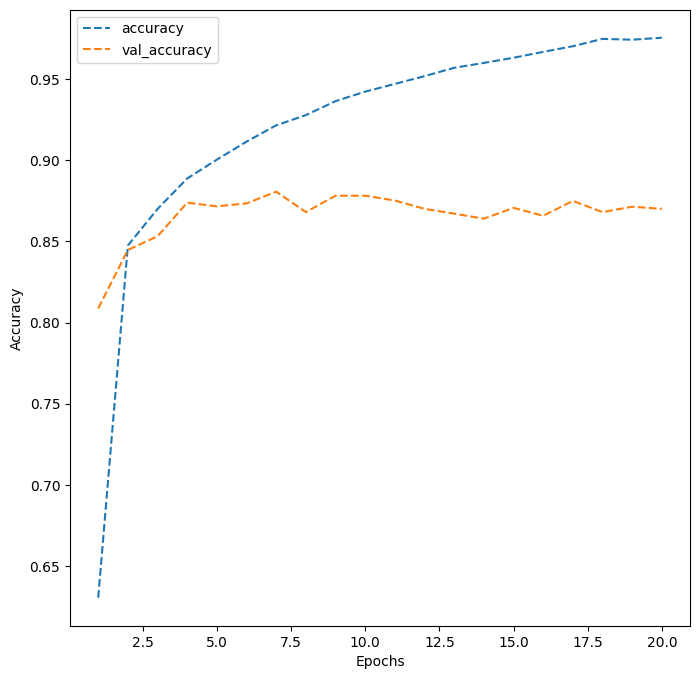

In [ ]:
import matplotlib.pyplot as plt

dict_hist = history_cnn_model_1.history # calling the model
list_ep = [i for i in range(1, 21)] # looping based on the 20 epochs
# plotting
plt.figure(figsize=(8, 8))
plt.plot(list_ep, dict_hist['accuracy'], ls='--', label='accuracy')
plt.plot(list_ep, dict_hist['val_accuracy'], ls='--', label='val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations:** The perform of the CNN shown from the plot indicates slight improvement compared to the ann model previously trained. But, the training accuracy was around 95%+ and has a drop in the initial epoch and increasing after the first epoch, while the validity accuracy was slightly worse with a drop of 10% equating to 85% with semi-linear line, it means that the model is slightly being overfitted based on the line being at around 85%-88%.

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
from tensorflow.keras import backend
backend.clear_session() # clearing previous session so that it wouldnt interfer with the next training
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42) # declaring the random seeds for reproducability

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [ ]:
from tensorflow.keras.models import Sequential # important libraries to be used to train the model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LeakyReLU, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

def cnn_model_2(input_shape): # ccn model function with its values given above
    model = Sequential()

    # first Convolutional layer
    model.add(Conv2D(16, (3, 3), padding='same', input_shape=input_shape))
    model.add(LeakyReLU(alpha=0.1))

    # second Convolutional layer
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    #third Convolutional layer
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    # fourth Convolutional layer
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    # flatten the output
    model.add(Flatten())
    # dense layer
    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.5))
    # output layer
    model.add(Dense(10, activation='softmax'))

    # Compiling the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

input_shape = (32, 32, 1) # declaring the shape

# Create the model
cnn_model_2 = cnn_model_2(input_shape) # calling function and giving the input shape

# Print the model summary
cnn_model_2.summary() # summary of the model


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                         

In [ ]:
history_cnn_model_2 = cnn_model_2.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=128, verbose=1) # training the model with the values given to train the second cnn model

Epoch 1/30
263/263 [==============================] - 122s 463ms/step - loss: 0.1462 - accuracy: 0.9514 - val_loss: 0.4197 - val_accuracy: 0.9150
Epoch 2/30
263/263 [==============================] - 113s 428ms/step - loss: 0.1377 - accuracy: 0.9549 - val_loss: 0.4235 - val_accuracy: 0.9101
Epoch 3/30
263/263 [==============================] - 113s 430ms/step - loss: 0.1426 - accuracy: 0.9525 - val_loss: 0.4585 - val_accuracy: 0.9133
Epoch 4/30
263/263 [==============================] - 111s 424ms/step - loss: 0.1438 - accuracy: 0.9532 - val_loss: 0.4928 - val_accuracy: 0.9126
Epoch 5/30
263/263 [==============================] - 109s 413ms/step - loss: 0.1338 - accuracy: 0.9551 - val_loss: 0.4467 - val_accuracy: 0.9169
Epoch 6/30
263/263 [==============================] - 116s 442ms/step - loss: 0.1310 - accuracy: 0.9566 - val_loss: 0.4744 - val_accuracy: 0.9167
Epoch 7/30
263/263 [==============================] - 109s 416ms/step - loss: 0.1263 - accuracy: 0.9570 - val_loss: 0.5290 -

### **Plot the Training and Validation accuracies and write your observations.**

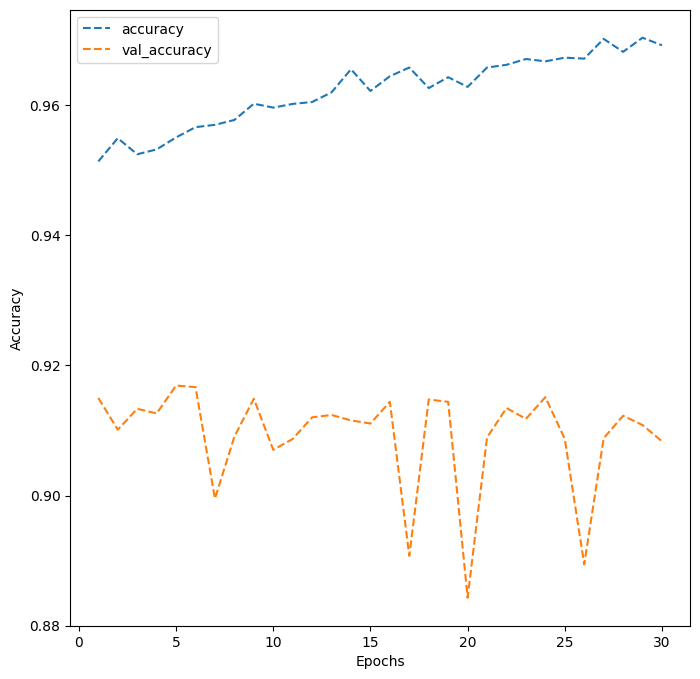

In [ ]:
import matplotlib.pyplot as plt

# plotting the training and validation accuracies
dict_hist = history_cnn_model_2.history # calling the model
list_ep = [i for i in range(1, 31)]
plt.figure(figsize=(8, 8))
plt.plot(list_ep, dict_hist['accuracy'], ls='--', label='accuracy')
plt.plot(list_ep, dict_hist['val_accuracy'], ls='--', label='val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend()
plt.show()

**Observations:** The model is performing well on the training data with an accuracy average of 95% for the entire epochs. While training data performed well, the validation accuracy did perform a bit worse with an average accuracy of 90% and with spikes at a couple of epochs, this shows that the model needs slight tuning for a better performance. Steps that could be taken would be different regularization technique and/or changing the hyperparameter to improve the validation performance.


## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [ ]:
# calling the model to predict on the test set
test_pred = cnn_model_2.predict(X_test)
test_pred = np.argmax(test_pred, axis=-1)

563/563 [==============================] - 18s 31ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

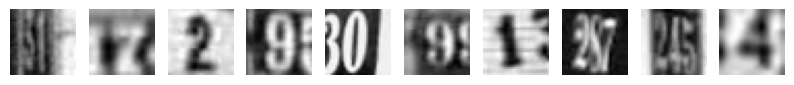

label for each image that the model predicted: [1 7 2 9 0 9 1 9 4 4]


In [ ]:
# plotting the model
plt.figure(figsize = (10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test[i], cmap = "gray")
    plt.axis('off')

plt.show()
# showing the result of the model with its assigned numbers
print('label for each image that the model predicted: %s' % (test_pred[0:10]))

### **Write your final observations on the performance of the model on the test data.**

563/563 [==============================] - 22s 39ms/step
classification report:

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1814
           1       0.94      0.88      0.91      1828
           2       0.92      0.92      0.92      1803
           3       0.91      0.87      0.89      1719
           4       0.92      0.93      0.92      1812
           5       0.89      0.91      0.90      1768
           6       0.89      0.91      0.90      1832
           7       0.92      0.92      0.92      1808
           8       0.92      0.89      0.90      1812
           9       0.91      0.91      0.91      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000

confusion Matrix:

[[1716   11   13    5   12    1   23    4   10   19]
 [  36 1616   18   30   48    9   13   44    7    7]
 [  16    8 1665   14   21    4    

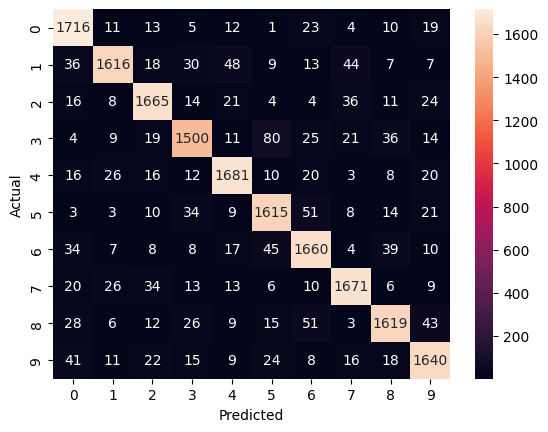

In [ ]:
# re calling the output of the model using the x test data set
y_pred_cnn = cnn_model_2.predict(X_test)
y_test_classes_cnn = np.argmax(y_test, axis=1)
y_pred_classes_cnn = np.argmax(y_pred_cnn, axis=1)
# outputting the classification report
print("classification report:\n")
print(classification_report(y_test_classes_cnn, y_pred_classes_cnn))
# confusion matrix to determine the performance of the model
print("confusion Matrix:\n")
conf_matrix_cnn = confusion_matrix(y_test_classes_cnn, y_pred_classes_cnn)
print(conf_matrix_cnn)
# heatmap plot for the confusion matrix
sns.heatmap(conf_matrix_cnn, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


**Final Observations:** Throughout all the models, CNN was the best performing for digit recognition, along with its higher accuracy of 90% for training and validity compared to the ANN model which sits at around 70% accuracy for both its training and validation resulting in a slight underfitting. The CNN is better for anything image related and would be more reliable to use than ANN model in the real-world applications, but CNN could also perform bad as show in the last image where the validation accuracy starts to plateaus as it was being overfitted. Both of the models could perform better if optimization techniques  were applied such as dropout, regularization, and/or changing the hyperparameters.

